# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\Rishabh Sharma\Anaconda3\envs\tensorflow_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

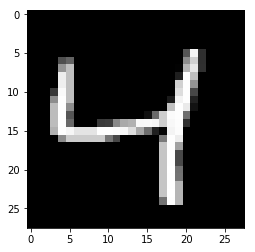

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,shape=(None,image_size),name = "inputs")
targets_ = tf.placeholder(tf.float32,shape=(None,image_size),name = "output")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)
# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)


## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6952
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6880
Epoch: 1/20... Training loss: 0.6842
Epoch: 1/20... Training loss: 0.6797
Epoch: 1/20... Training loss: 0.6740
Epoch: 1/20... Training loss: 0.6672
Epoch: 1/20... Training loss: 0.6582
Epoch: 1/20... Training loss: 0.6487
Epoch: 1/20... Training loss: 0.6376
Epoch: 1/20... Training loss: 0.6254
Epoch: 1/20... Training loss: 0.6142
Epoch: 1/20... Training loss: 0.5976
Epoch: 1/20... Training loss: 0.5825
Epoch: 1/20... Training loss: 0.5668
Epoch: 1/20... Training loss: 0.5465
Epoch: 1/20... Training loss: 0.5266
Epoch: 1/20... Training loss: 0.5111
Epoch: 1/20... Training loss: 0.4900
Epoch: 1/20... Training loss: 0.4742
Epoch: 1/20... Training loss: 0.4579
Epoch: 1/20... Training loss: 0.4430
Epoch: 1/20... Training loss: 0.4247
Epoch: 1/20... Training loss: 0.4069
Epoch: 1/20... Training loss: 0.4028
Epoch: 1/20... Training loss: 0.3823
Epoch: 1/20... Training loss: 0.3740
E

Epoch: 1/20... Training loss: 0.1999
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1973
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1868
E

Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1483
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1629
E

Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1273
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1350
E

Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1179
E

Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1172
E

Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1066
E

Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.0999
Epoch: 6/20... Training loss: 0.1050
E

Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0983
E

Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0970
E

Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0908
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0958
E

Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0966
E

Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.1008
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0903
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.1003
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0998
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.1012
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0990
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0978
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0872
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0886
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0993
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0886
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0992
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

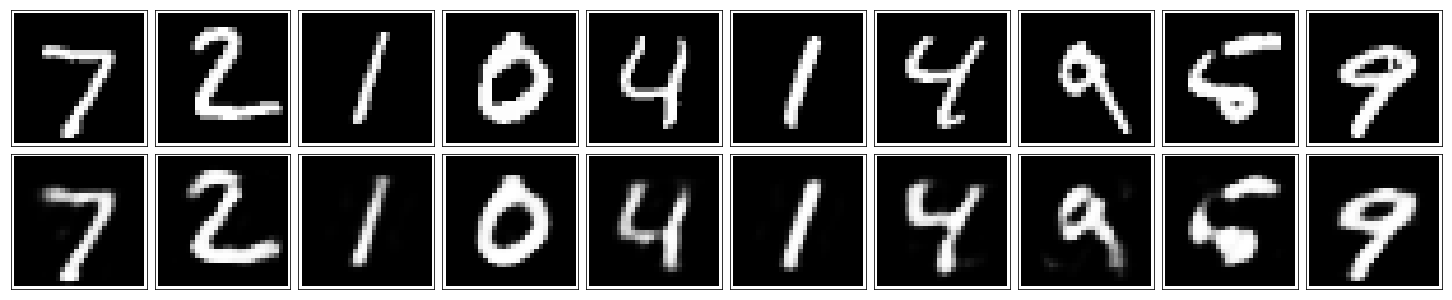

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.